In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [4]:
#Load weight data into data frame
url_data = 'https://raw.githubusercontent.com/Thinkful-Ed/'\
            'curric-data-001-data-sets/master/ideal-weight/ideal_weight.csv'
weight_data = pd.read_csv(url_data, header = 0, delimiter = ',')

#Clean up data
weight_data.columns = [n.strip("'") for n in weight_data.columns]
weight_data['sex'] = [n.strip("'") for n in weight_data['sex']]
weight_data = weight_data.set_index('id')
weight_data['sex'] = weight_data['sex'].astype('category')

weight_data.tail()

,sex,actual,ideal,diff
id,,,,
177,Male,180,180,0
178,Female,125,120,5
179,Male,158,150,8
180,Female,130,130,0
181,Female,118,118,0


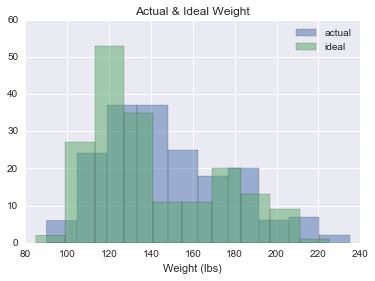

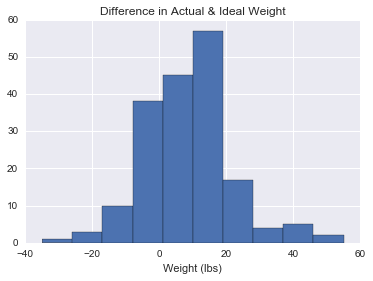

In [8]:
#Graph actual and ideal weight
plt.hist(weight_data['actual'], alpha = 0.5)
plt.hist(weight_data['ideal'], alpha = 0.5)
plt.legend(['actual','ideal'])
plt.title('Actual & Ideal Weight')
plt.xlabel('Weight (lbs)')
plt.savefig('Acutal & Ideal Weight', dpi = 100)

#Graph actual and ideal weight
plt.figure()
plt.hist(weight_data['diff'])
plt.title('Difference in Actual & Ideal Weight')
plt.xlabel('Weight (lbs)')
plt.savefig('Difference in Actual & Ideal Weight', dpi = 100)

In [6]:
print('There are %d females and %d males in the dataset' 
      % (weight_data['sex'].value_counts()[0],weight_data['sex'].value_counts()[1]))

There are 119 females and 63 males in the dataset


In [7]:
#Build NB model
model = GaussianNB()

model.fit(weight_data[['actual', 'ideal', 'diff']], weight_data['sex'])

weight_data['predict'] = model.predict(weight_data[['actual', 'ideal', 'diff']])

print('%d points were mislabeled out of %d points'
         % ((weight_data['sex'] != weight_data['predict']).sum(), len(weight_data)))

new_ppl = [[145, 160, -15], [160, 145, 15]]
for person in new_ppl:
    print('\nAn individual with an actual weight of %d, '\
            'an ideal weight of %d and '\
            'weight different of %d '\
            'is most likely %s' % 
            (person[0], 
             person[1], 
             person[2],
             model.predict([person])[0]))

14 points were mislabeled out of 182 points

An individual with an actual weight of 145, an ideal weight of 160 and weight different of -15 is most likely Male

An individual with an actual weight of 160, an ideal weight of 145 and weight different of 15 is most likely Female
